In [35]:
import pandas as pd
import numpy as np
from dataclass import Rx

df = pd.read_excel("./data - 副本.xlsx")

In [36]:
mask = (df["原始诊断"]!="无诊断") & (df["统计项"]=="标准片数") & (df["来源"] == "门诊") & (df["关注科室"].isin(["肾内科"]))
df2 = df.loc[mask,:]
r = Rx(df2, name="门诊心内科标准片数")

In [13]:
r.get_undup_cbns().to_clipboard()

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\dataclass.py:108: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


In [18]:
r.get_undup_cbns_groupby("关注科室").to_clipboard()

In [19]:
r.get_undup_cbns_groupby("通用名").to_clipboard()

In [32]:
r.get_undup_cbns_groupby("商品名").to_clipboard()

In [20]:
r.get_dup_cbns().to_clipboard()

In [21]:
r.get_dup_cbns_groupby("关注科室").to_clipboard()

In [23]:
r.get_dup_cbns_groupby("通用名").to_clipboard()

In [33]:
r.get_dup_cbns_groupby("商品名").to_clipboard()

In [24]:
r.get_cbns_len().to_clipboard()

In [25]:
r.get_cbns_len_groupby("关注科室").to_clipboard()

In [26]:
r.get_cbns_len_groupby("通用名").to_clipboard()

In [34]:
r.get_cbns_len_groupby("商品名").to_clipboard()

(0.7873439007240222, 0.0013108607109764267, 0.0034821186190476423) [0.7908260193430698, 0.004792979330024069]
('高血压', '慢性肾病')


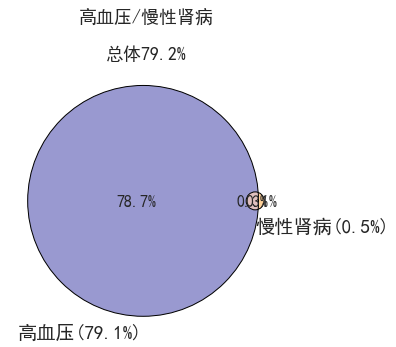

In [20]:
from itertools import combinations

r.plot_venn(('高血压', "慢性肾病"))
# labels = df.columns[-8:]
# set2 = combinations(labels, 2)

# for set in set2:
#     plot_venn(set)

In [37]:
r.plot_barh("通用名")

c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\dataclass.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(df.columns[0], ascending=False, inplace=True)
c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\venv37\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


./plots/通用名适应症贡献占比.png has been saved...


c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\dataclass.py:108: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels
c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\dataclass.py:108: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.labels = labels


./plots/通用名高血压合并贡献占比.png has been saved...
